In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("train.csv")
df.head(2)

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               1               1  0.641791  0.581818  ...   
1               2               3               1  0.059701  0.600000  ...   

   Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0                   0                   0                   0   
1                   0                   0                   0   

   Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                   0                   0                   0   
1                   0                   0                   0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
0                   0                   0                   0         8  
1                   0                   0                   0         4  

[2 rows x 128 columns]

### Q1. 종속변수의 원소별 개수를 확인하시오.

In [11]:
df["Response"].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

### Q2. 종속변수의 원소별 구성비를 확인하시오.

In [ ]:
df["Response"].value_counts(normalize = True)

### Q3. 이름이 긴 변수명은 전부 약어로 변경하시오.

In [10]:
df.columns = df.columns.str.replace("Product_Info", "PI")
df.columns = df.columns.str.replace("Medical_Keyword", "MK")
df.columns = df.columns.str.replace("Employment_Info", "EI")
df.columns = df.columns.str.replace("InsuredInfo_Info", "II")
df.columns = df.columns.str.replace("Insurance_History", "IH")
df.columns = df.columns.str.replace("Family_History", "FH")
df.columns = df.columns.str.replace("Medical_History", "MH")
df.columns

Index(['Id', 'PI_1', 'PI_2', 'PI_3', 'PI_4', 'PI_5', 'PI_6', 'PI_7', 'Ins_Age',
       'Ht',
       ...
       'MK_40', 'MK_41', 'MK_42', 'MK_43', 'MK_44', 'MK_45', 'MK_46', 'MK_47',
       'MK_48', 'Response'],
      dtype='object', length=128)

## EDA - Product Info

In [12]:
df_pi = df.loc[:, df.columns.str.contains("PI")]
df_pi.head(1)

PI_1 PI_2  PI_3      PI_4  PI_5  PI_6  PI_7
0     1   D3    10  0.076923     2     1     1

### Q4. Product Info 관련 변수의 데이터 타입을 확인하시오.

In [13]:
df_pi.dtypes

PI_1      int64
PI_2     object
PI_3      int64
PI_4    float64
PI_5      int64
PI_6      int64
PI_7      int64
dtype: object

In [14]:
df_pi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PI_1    59381 non-null  int64  
 1   PI_2    59381 non-null  object 
 2   PI_3    59381 non-null  int64  
 3   PI_4    59381 non-null  float64
 4   PI_5    59381 non-null  int64  
 5   PI_6    59381 non-null  int64  
 6   PI_7    59381 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 3.2+ MB


In [15]:
df_pi.isna().sum()

PI_1    0
PI_2    0
PI_3    0
PI_4    0
PI_5    0
PI_6    0
PI_7    0
dtype: int64

### Q5. 수치형 변수를 탐색하시오.

In [16]:
df_pi_n = df_pi.select_dtypes(include = "number")
df_pi_n.head(2)

PI_1  PI_3      PI_4  PI_5  PI_6  PI_7
0     1    10  0.076923     2     1     1
1     1    26  0.076923     2     3     1

In [17]:
df_pi_n.nunique()

PI_1       2
PI_3      34
PI_4    1491
PI_5       2
PI_6       2
PI_7       3
dtype: int64

In [19]:
df_pi["PI_1"].value_counts(normalize = True)

1    0.973645
2    0.026355
Name: PI_1, dtype: float64

In [21]:
# df_pi["PI_3"].value_counts(normalize = True)
df_pi["PI_3"].value_counts(normalize = True).sort_index()

1     0.000017
2     0.000135
3     0.000034
4     0.000977
5     0.000017
6     0.000051
8     0.000808
9     0.000185
10    0.101177
11    0.000674
12    0.000034
13    0.000017
15    0.004227
16    0.000017
17    0.000051
18    0.000017
19    0.000017
20    0.000017
21    0.000185
22    0.000017
23    0.000168
24    0.000017
26    0.857042
27    0.000017
28    0.000623
29    0.022465
30    0.001078
31    0.006921
32    0.000034
33    0.000152
34    0.000034
36    0.000421
37    0.002341
38    0.000017
Name: PI_3, dtype: float64

<AxesSubplot:>

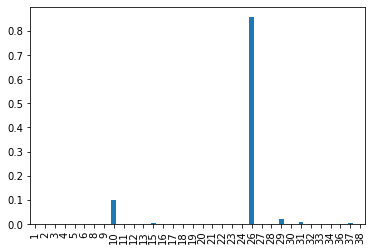

In [22]:
df_pi["PI_3"].value_counts(normalize = True).sort_index().plot.bar()

In [23]:
df_pi["PI_4"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00    0.000000
0.25    0.076923
0.50    0.230769
0.75    0.487179
1.00    1.000000
Name: PI_4, dtype: float64

In [24]:
df_pi["PI_4"].std()

0.2825620735507279

<AxesSubplot:>

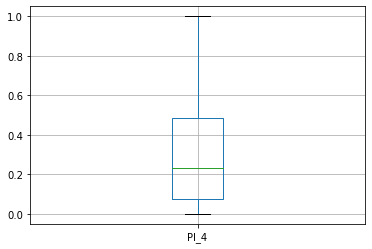

In [29]:
df_pi[["PI_4"]].boxplot()

In [31]:
df_pi["PI_5"].value_counts(normalize = True)

2    0.993045
3    0.006955
Name: PI_5, dtype: float64

In [32]:
df_pi["PI_6"].value_counts(normalize = True)

3    0.8368
1    0.1632
Name: PI_6, dtype: float64

In [33]:
df_pi["PI_7"].value_counts(normalize = True)

1    0.978192
3    0.021775
2    0.000034
Name: PI_7, dtype: float64

### Q6. 범주형 변수를 탐색하시오.

In [35]:
df_pi["PI_2"].value_counts().sort_index()

A1     2363
A2     1974
A3      977
A4      210
A5      775
A6     2098
A7     1383
A8     6835
B1       54
B2     1122
C1      285
C2      160
C3      306
C4      219
D1     6554
D2     6286
D3    14321
D4    10812
E1     2647
Name: PI_2, dtype: int64

In [36]:
# !pip install pandas-profiling --user

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=cf81041b32d4ddf32cda17f46f4b96e30c6aa094c71d750f5a0633817320a2ab
  Stored in directory: c:\users\encai\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


In [38]:
import pandas_profiling as pp

In [39]:
report_pi = df_pi.profile_report()

In [41]:
report_pi

## EDA - personal info

In [44]:
df_p = df[["Ins_Age", "Ht", "Wt", "BMI"]]
df_p.head(2)

Ins_Age        Ht        Wt       BMI
0  0.641791  0.581818  0.148536  0.323008
1  0.059701  0.600000  0.131799  0.272288

In [47]:
import numpy as np
np.linspace(0, 1, num = 9)

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ])

<AxesSubplot:ylabel='Frequency'>

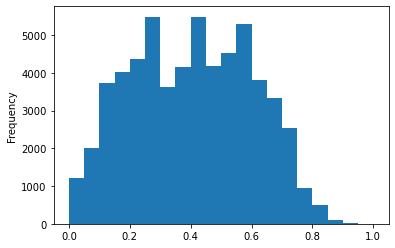

In [48]:
df_p["Ins_Age"].plot.hist(bins = 20)

### Q7. Ins_Age 변수를 범주형 변수로 변환하시오.
※ 0부터 1까지 9개의 숫자로 등분하고 해당 숫자를 분할 기준으로 하시오.  
※ pd.cut() 함수를 사용하여 해당 작업을 실시하시오.  
※ pd.cut() 함수의 labels는 0부터 7까지, right 인자에는 False를 할당하시오.  
※ 번환한 범주형 변수는 df 객체와 df_p 객체에 "Age_g" 변수로 저장하시오.  

In [53]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [55]:
[n for n in range(8)]

[0, 1, 2, 3, 4, 5, 6, 7]

In [72]:
age_cut = pd.cut(df_p["Ins_Age"], bins = np.linspace(0, 1, num = 9),
                 labels = np.arange(8), right = False)
age_cut.head()

0    5
1    0
2    0
3    1
4    3
Name: Ins_Age, dtype: category
Categories (8, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6 < 7]

In [73]:
df["Age_g"] = age_cut
df_p["Age_g"] = age_cut

C:\Users\encai\AppData\Local\Temp\ipykernel_13508\2333173825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p["Age_g"] = age_cut


In [74]:
df_p.head()

Ins_Age        Ht        Wt       BMI Age_g
0  0.641791  0.581818  0.148536  0.323008     5
1  0.059701  0.600000  0.131799  0.272288     0
2  0.029851  0.745455  0.288703  0.428780     0
3  0.164179  0.672727  0.205021  0.352438     1
4  0.417910  0.654545  0.234310  0.424046     3

### Q8. df_p 객체의 변수를 탐색하시오.

In [76]:
df_p["Age_g"] = df_p["Age_g"].cat.codes

C:\Users\encai\AppData\Local\Temp\ipykernel_13508\3914835866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p["Age_g"] = df_p["Age_g"].cat.codes


In [77]:
df_p.head(2)

Ins_Age        Ht        Wt       BMI  Age_g
0  0.641791  0.581818  0.148536  0.323008      5
1  0.059701  0.600000  0.131799  0.272288      0

In [78]:
df_p.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [80]:
df.iloc[:2, 10:30]

Wt       BMI   EI_1  EI_2  EI_3  EI_4  EI_5    EI_6  InsuredInfo_1  \
0  0.148536  0.323008  0.028    12     1   0.0     3     NaN              1   
1  0.131799  0.272288  0.000     1     3   0.0     2  0.0018              1   

   InsuredInfo_2  InsuredInfo_3  InsuredInfo_4  InsuredInfo_5  InsuredInfo_6  \
0              2              6              3              1              2   
1              2              6              3              1              2   

   InsuredInfo_7  IH_1  IH_2  IH_3  IH_4      IH_5  
0              1     1     1     3     1  0.000667  
1              1     2     1     3     1  0.000133

## EDA - Employment Info

In [84]:
df_e = df.loc[:, df.columns.str.contains("EI")].reset_index(drop = True)
df_e.head(2)

EI_1  EI_2  EI_3  EI_4  EI_5    EI_6
0  0.028    12     1   0.0     3     NaN
1  0.000     1     3   0.0     2  0.0018

### Q. 각 변수를 탐색하시오.

In [85]:
df_e.isna().sum()

EI_1       19
EI_2        0
EI_3        0
EI_4     6779
EI_5        0
EI_6    10854
dtype: int64